In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [17]:
results = pd.read_csv('results_A.csv', index_col=0)
results.head(5)

,Vendor,Centre,Dice_BG,Dice_LV,Dice_RV,Dice_MYO,IoU_BG,IoU_LV,IoU_RV,IoU_MYO,HD_BG,HD_LV,HD_RV,HD_MYO
External code,,,,,,,,,,,,,,
A0S9V9,A,1,0.993953,0.972159,0.880089,0.939552,0.987979,0.945825,0.785856,0.885996,3.162278,4.123106,5.000000,5.830952
A1D0Q7,B,2,0.970675,0.920322,0.798010,0.703797,0.943021,0.852404,0.663908,0.542969,8.000000,5.000000,9.055385,17.233688
A1D9Z7,A,1,0.990909,0.913051,0.912445,0.929837,0.981983,0.840012,0.838988,0.868874,4.000000,7.071068,5.000000,5.099020
A1E9Q1,A,1,0.991041,0.961361,0.858095,0.931986,0.982240,0.925597,0.751459,0.872634,3.000000,4.123106,5.385165,10.630146
A1K2P5,D,5,0.988154,0.920730,0.798993,0.926313,0.976585,0.853104,0.665269,0.862740,4.000000,7.000000,10.295630,11.224972


In [18]:
grouped_by_vendor = results.groupby(['Vendor', 'Centre']).mean()
grouped_by_vendor

Dice_BG   Dice_LV   Dice_RV  Dice_MYO    IoU_BG    IoU_LV  \
Vendor Centre                                                               
A      1       0.992532  0.959896  0.900348  0.939456  0.985184  0.923431   
B      2       0.961285  0.672359  0.641509  0.652826  0.925879  0.530117   
       3       0.984115  0.927102  0.818332  0.871152  0.968795  0.865347   
C      4       0.975009  0.836737  0.712454  0.736670  0.951764  0.738235   
D      5       0.978100  0.879998  0.735920  0.819072  0.957314  0.790330   

                 IoU_RV   IoU_MYO     HD_BG      HD_LV      HD_RV     HD_MYO  
Vendor Centre                                                                 
A      1       0.819178  0.886216  3.565127   3.695562   4.847883   6.555745  
B      2       0.481286  0.507434  6.594553  10.446436  11.959137  18.971645  
       3       0.693565  0.776761  5.285357   6.775076   8.230993  10.463269  
C      4       0.568301  0.625729  4.452451   9.373909  10.329859  19.739264  
D      5       0.588550  0.714497  3.948263   8.048480  10.884691  13.794813

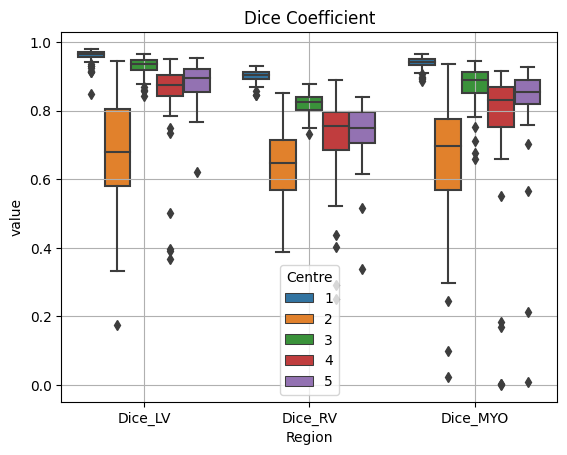

In [19]:
ax = sns.boxplot(data = results.melt(id_vars = 'Centre',
                  value_vars = ['Dice_LV',
                                'Dice_RV',
                                'Dice_MYO'],
                  var_name = 'Region'),
                hue = 'Centre',
                x = 'Region',
                y = 'value')
plt.title("Dice Coefficient")
plt.grid(True)
plt.show()

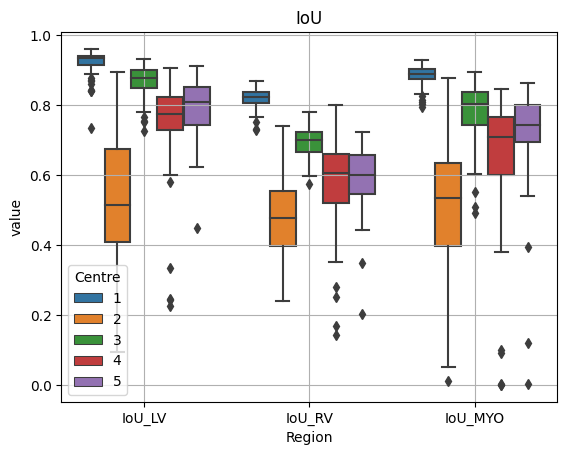

In [20]:
ax = sns.boxplot(data = results.melt(id_vars = 'Centre',
                  value_vars = ['IoU_LV',
                                'IoU_RV',
                                'IoU_MYO'],
                  var_name = 'Region'),
                hue = 'Centre',
                x = 'Region',
                y = 'value')
plt.title("IoU")
plt.grid(True)
plt.show()

In [21]:
results2 = pd.read_csv('results_A_rescale_percentile.csv', index_col=0)
results2.head(5)

,Vendor,Centre,Dice_BG,Dice_LV,Dice_RV,Dice_MYO,IoU_BG,IoU_LV,IoU_RV,IoU_MYO,HD_BG,HD_LV,HD_RV,HD_MYO
External code,,,,,,,,,,,,,,
A0S9V9,A,1,0.992206,0.969943,0.842496,0.925778,0.984533,0.941641,0.727855,0.861813,3.162278,2.828427,5.385165,24.103942
A1D0Q7,B,2,0.972090,0.923932,0.753618,0.810932,0.945696,0.858619,0.604644,0.681989,9.000000,6.708204,9.055385,10.440307
A1D9Z7,A,1,0.983341,0.922714,0.864009,0.878124,0.967228,0.856517,0.760577,0.782729,4.000000,4.472136,6.082763,51.942276
A1E9Q1,A,1,0.994080,0.969714,0.891919,0.948846,0.988229,0.941208,0.804922,0.902671,3.000000,3.000000,3.605551,8.485281
A1K2P5,D,5,0.982934,0.920657,0.789860,0.872202,0.966440,0.852979,0.652701,0.773368,4.000000,6.082763,9.949874,16.124515


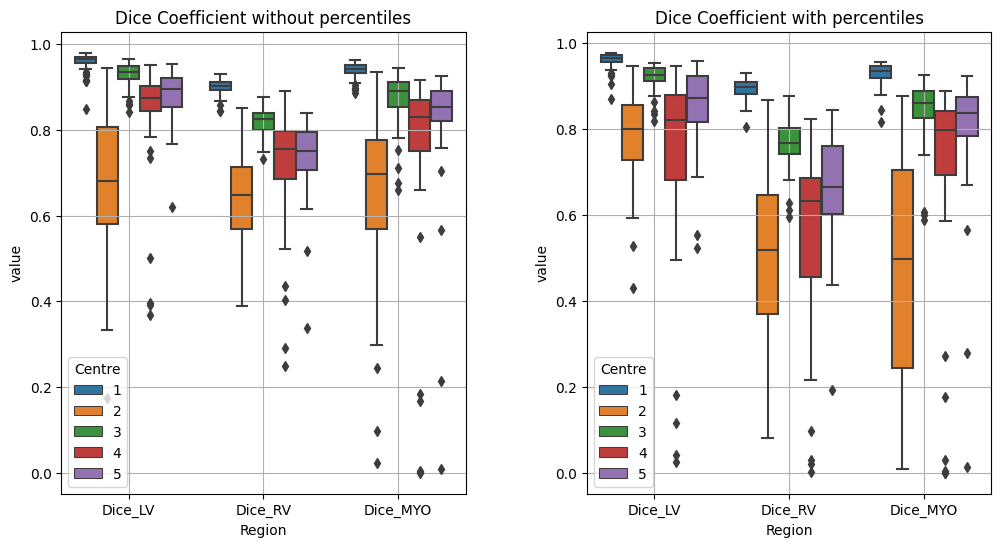

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=results.melt(id_vars='Centre',
                              value_vars=['Dice_LV', 'Dice_RV', 'Dice_MYO'],
                              var_name='Region'),
            hue='Centre',
            x='Region',
            y='value',
            ax=ax1)

ax1.set_title("Dice Coefficient without percentiles")
ax1.grid(True)

sns.boxplot(data=results2.melt(id_vars='Centre',
                              value_vars=['Dice_LV', 'Dice_RV', 'Dice_MYO'],
                              var_name='Region'),
            hue='Centre',
            x='Region',
            y='value',
            ax=ax2)

ax2.set_title("Dice Coefficient with percentiles")
ax2.grid(True)

plt.subplots_adjust(wspace=0.3)
plt.show()